# COMP 579 Assignment 1

Deadline: Thursday, January 25th, 2024

Author:
* Jiahang Wang: jiahang.wang@mail.mcgill.ca
* Li Jiang: li.jiang3@mail.mcgill.ca


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math


plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [ ]:
class BernoulliBandit:
  """
  A class for Bernoulli multi-armed bandit.

  Attributes
  ----------
  num_arms : int
      The number of arms in the bernoulli bandit
  probs_arr : array of integer (size num_arms)
      The binomial distribution parameter p_k (probability of drawing 1) of each arm indexed from 0

  Methods
  -------
  sample(arm_index)
      Returns a reward sample of the binomial distribution indexed by the arm_index (return 0 with probability
      1-probs_arr[k] and 1 with probability probs_arr[k])
  """

  def __init__(self, num_arms, probs_arr):
        self.num_arms = num_arms
        self.probs_arr = probs_arr

  def sample(self, arm_index):
        # Check if the arm_index is valid
        if arm_index < 0 or arm_index >= self.num_arms:
            raise ValueError("Invalid arm index")

        # Simulate the Bernoulli trial
        return 1 if random.random() < self.probs_arr[arm_index] else 0

In [ ]:
delta = 0.1
num_arms = 3
probs_arr = [0.5 + delta, 0.5, 0.5 - delta]
num_samples = 50

# Creating an instance of the BernoulliBandit
three_arm_bernoulli_bandit = BernoulliBandit(num_arms, probs_arr)

# Defining the range of actions
actions = range(num_arms)

# Generating the samples
action_rewards = []
for action in actions:
    rewards = [three_arm_bernoulli_bandit.sample(action) for _ in range(num_samples)]
    action_rewards.append(rewards)

### Graphs

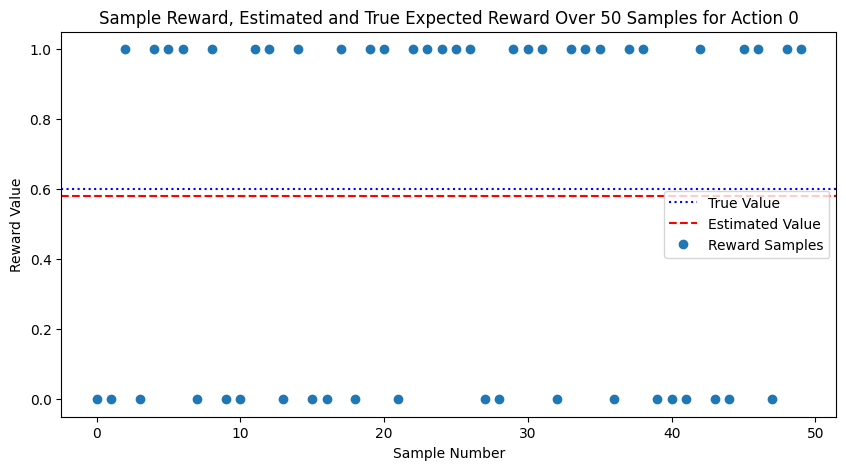

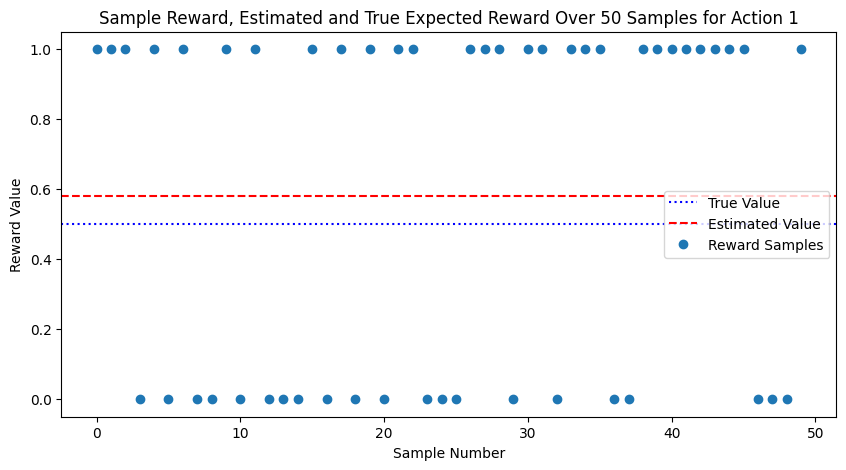

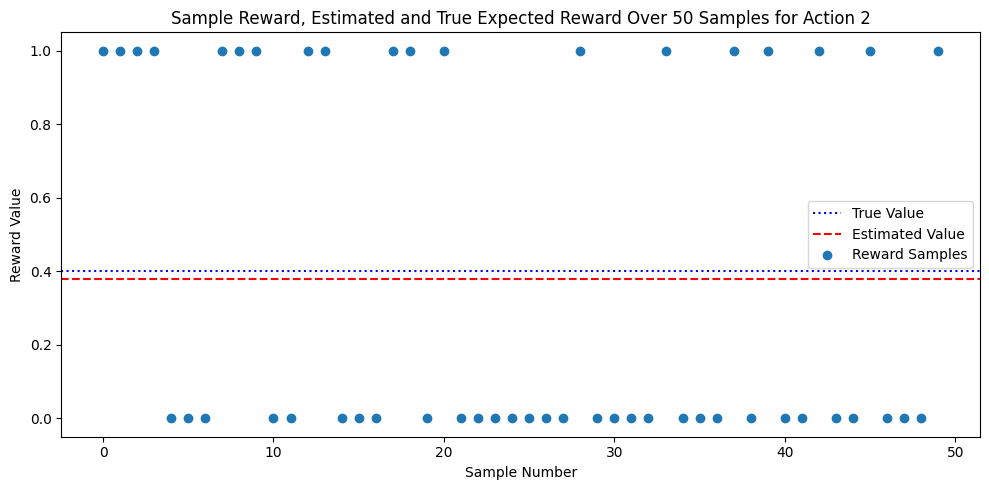

In [ ]:
for action in actions:
    fig, ax = plt.subplots()

    # Calculate the true and estimated values
    true_value = probs_arr[action]
    estimated_value = sum(action_rewards[action]) / len(action_rewards[action])

    # Draw the line of the true value
    line_true_val = ax.axhline(y=true_value, color='b', linestyle=':', label="True Value")
    # Draw the line of the estimated value
    line_est_val = ax.axhline(y=estimated_value, color='r', linestyle='--', label="Estimated Value")
    # Plot the reward samples
    plt_samples, = ax.plot(action_rewards[action], 'o', label="Reward Samples")

    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Reward Value")
    ax.set_title(f"Sample Reward, Estimated and True Expected Reward Over 50 Samples for Action {action}")

    # Show the legend with the labels of the lines
    ax.legend(handles=[line_true_val, line_est_val, plt_samples])

plt.tight_layout()
plt.show()

## Q2 Estimated Q values

In [ ]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """
  prev_val = 0
  for sample in reward_samples:
    new_val = prev_val + alpha * (sample - prev_val)
    prev_val = new_val
    yield new_val

def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
  prev_val = reward_samples[0]
  n = 1
  yield prev_val  # Yield the first sample as is

  for sample in reward_samples[1:]:  # Start from second sample
      n += 1
      new_val = prev_val + (sample - prev_val) / n
      prev_val = new_val
      yield new_val

### Graphs

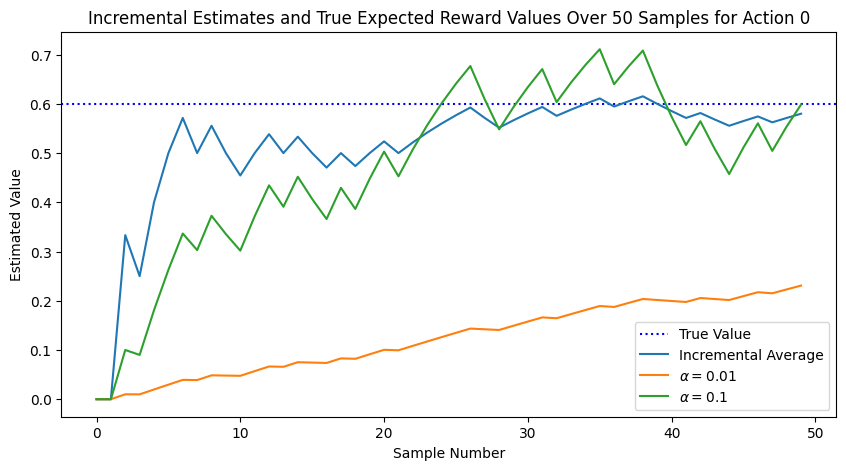

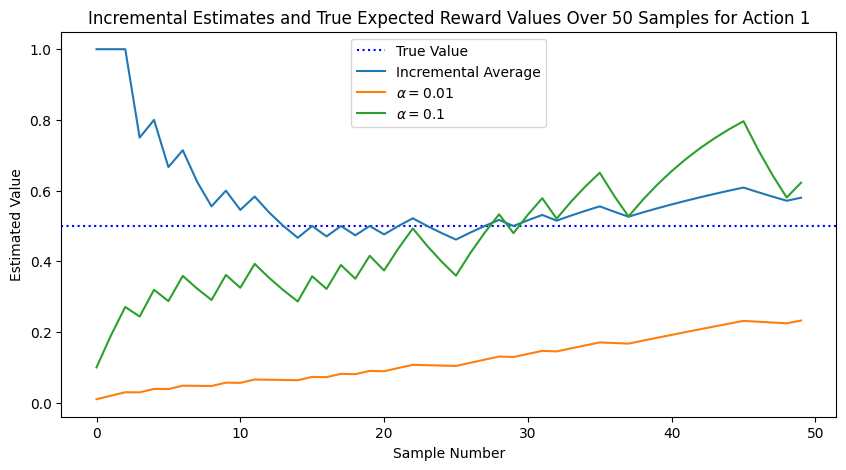

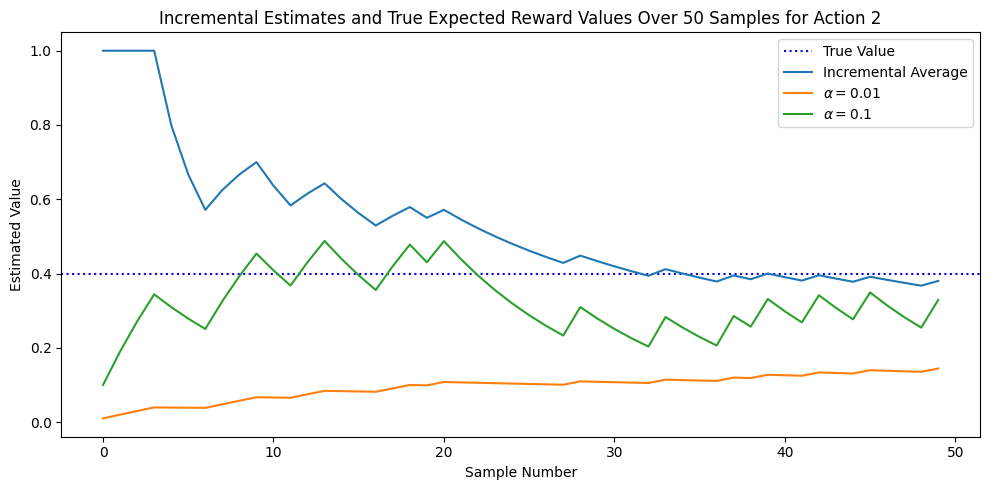

In [ ]:
for action in actions:
    fig, ax = plt.subplots()

    # Obtain incremental values for averaging, alpha = 0.01, alpha = 0.1
    incr_avgs = list(updateAvg(action_rewards[action]))
    alpha_1_percent = list(update(action_rewards[action], 0.01))
    alpha_10_percent = list(update(action_rewards[action], 0.1))

    # True value
    true_value = probs_arr[action]

    # Draw the true value line
    line_true_val = ax.axhline(y=true_value, color='b', linestyle=':', label="True Value")

    # Plot incremental values for averaging, alpha = 0.01, alpha = 0.1
    plt_incr_avgs, = ax.plot(incr_avgs, label="Incremental Average")
    plt_alpha_1_percent, = ax.plot(alpha_1_percent, label=r"$\alpha = 0.01$")
    plt_alpha_10_percent, = ax.plot(alpha_10_percent, label=r"$\alpha = 0.1$")

    # Set labels and title
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Estimated Value")
    ax.set_title(f"Incremental Estimates and True Expected Reward Values Over 50 Samples for Action {action}")

    # Show the legend
    ax.legend()

plt.tight_layout()
plt.show()


## Q3 Effect of $α$ on Estimated Q values

In [ ]:
num_samples = 100
num_runs = 100

# Arrays to store data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []

for run in range(num_runs):
    # Arrays of data generated from the 3 actions in 1 run
    sample_incr_avgs_by_actions = []
    sample_alpha_1_percent_by_actions = []
    sample_alpha_10_percent_by_actions = []

    for action in actions:
        # Generating new rewards for each run and action
        rewards = [three_arm_bernoulli_bandit.sample(action) for _ in range(num_samples)]

        # Calculating and storing the incremental averages and alpha estimates
        sample_incr_avgs_by_actions.append(list(updateAvg(rewards)))
        sample_alpha_1_percent_by_actions.append(list(update(rewards, 0.01)))
        sample_alpha_10_percent_by_actions.append(list(update(rewards, 0.1)))

    incr_avgs_runs.append(sample_incr_avgs_by_actions)
    alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
    alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)

# Convert to NumPy arrays for easier manipulation
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)

### Graphs

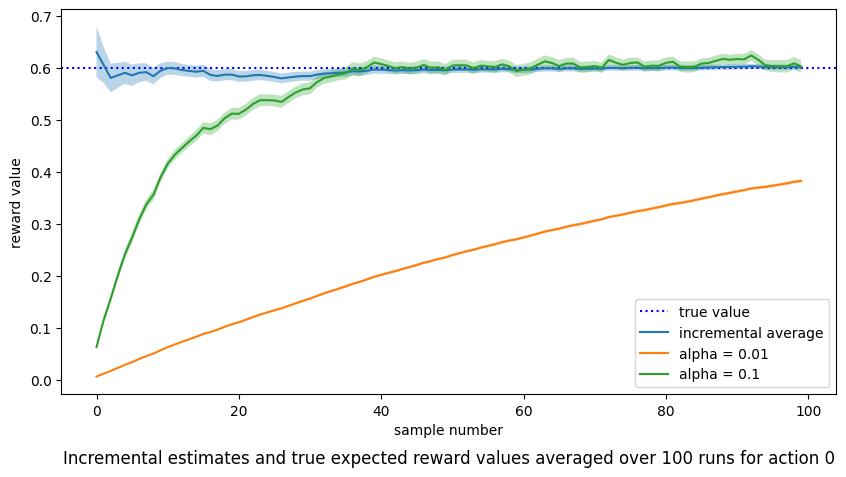

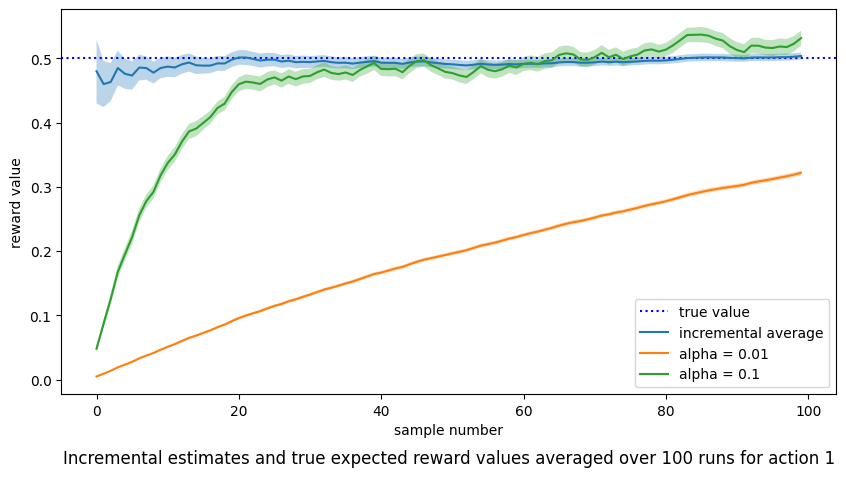

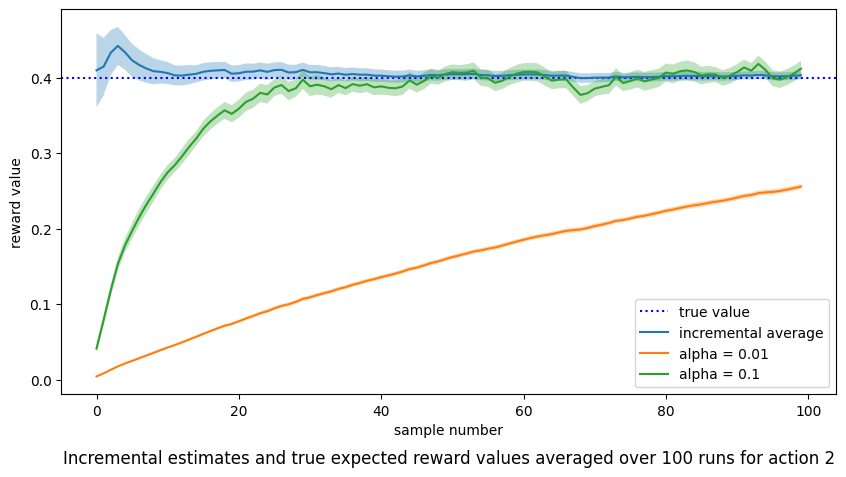

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:,action,:], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:,action,:], axis=0)
  mean_alpha_10_percent_by_actions = np.mean(alpha_10_percent_runs[:,action,:], axis=0)
  true_value = probs_arr[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0)
  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  std_err_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0) / np.sqrt(np.size(incr_avgs_runs[:,action,:], axis=0))
  std_err_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_1_percent_runs[:,action,:], axis=0))
  std_err_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_10_percent_runs[:,action,:], axis=0))

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent])

### Answers

The learning rate α of 0.1 converges faster but with more variance than averaging, while α of 0.01 showing slower convergence but greater stability. To optimize α, α select between 0.01 and 0.1 could provide a balance between stability and responsiveness(convergence speed).

## Q4 Epsilon-greedy

In [ ]:
def epsilon_greedy(bandit, epsilon, alpha=None, num_time_step=1000):
    num_arms = bandit.num_arms

    Q_arr = np.zeros(num_arms)  # array of estimated average reward for each action
    N_arr = np.zeros(num_arms)  # array of number of times each action was picked
    total_R = 0
    total_l = 0
    actions = range(num_arms)

    # Finding the optimal value and the best action
    opt_value = max(bandit.probs_arr)  # highest expected reward among all actions
    best_action = [i for i, p in enumerate(bandit.probs_arr) if p == opt_value]  # indices of actions with the highest expected reward

    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    for time_step in range(num_time_step):
        # Select the action with the highest estimated reward; randomly break ties
        A_star = np.random.choice([i for i, q in enumerate(Q_arr) if q == max(Q_arr)])
        A_random = np.random.choice(actions)
        A = A_random if random.random() < epsilon else A_star  # pick A_star with probability 1-epsilon, else A_random

        # Get reward for chosen action
        curr_R = bandit.sample(A)
        N_arr[A] += 1

        # Update Q values
        if alpha is None:
            # Incremental averaging
            Q_arr[A] += (curr_R - Q_arr[A]) / N_arr[A]
        else:
            # Update with fixed learning rate alpha
            Q_arr[A] += alpha * (curr_R - Q_arr[A])

        # Record rewards and estimates
        R_over_t.append(curr_R)
        total_R += curr_R
        total_R_over_t.append(total_R)

        est_is_best = 1 if A in best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - bandit.probs_arr[A]  # instantaneous regret
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

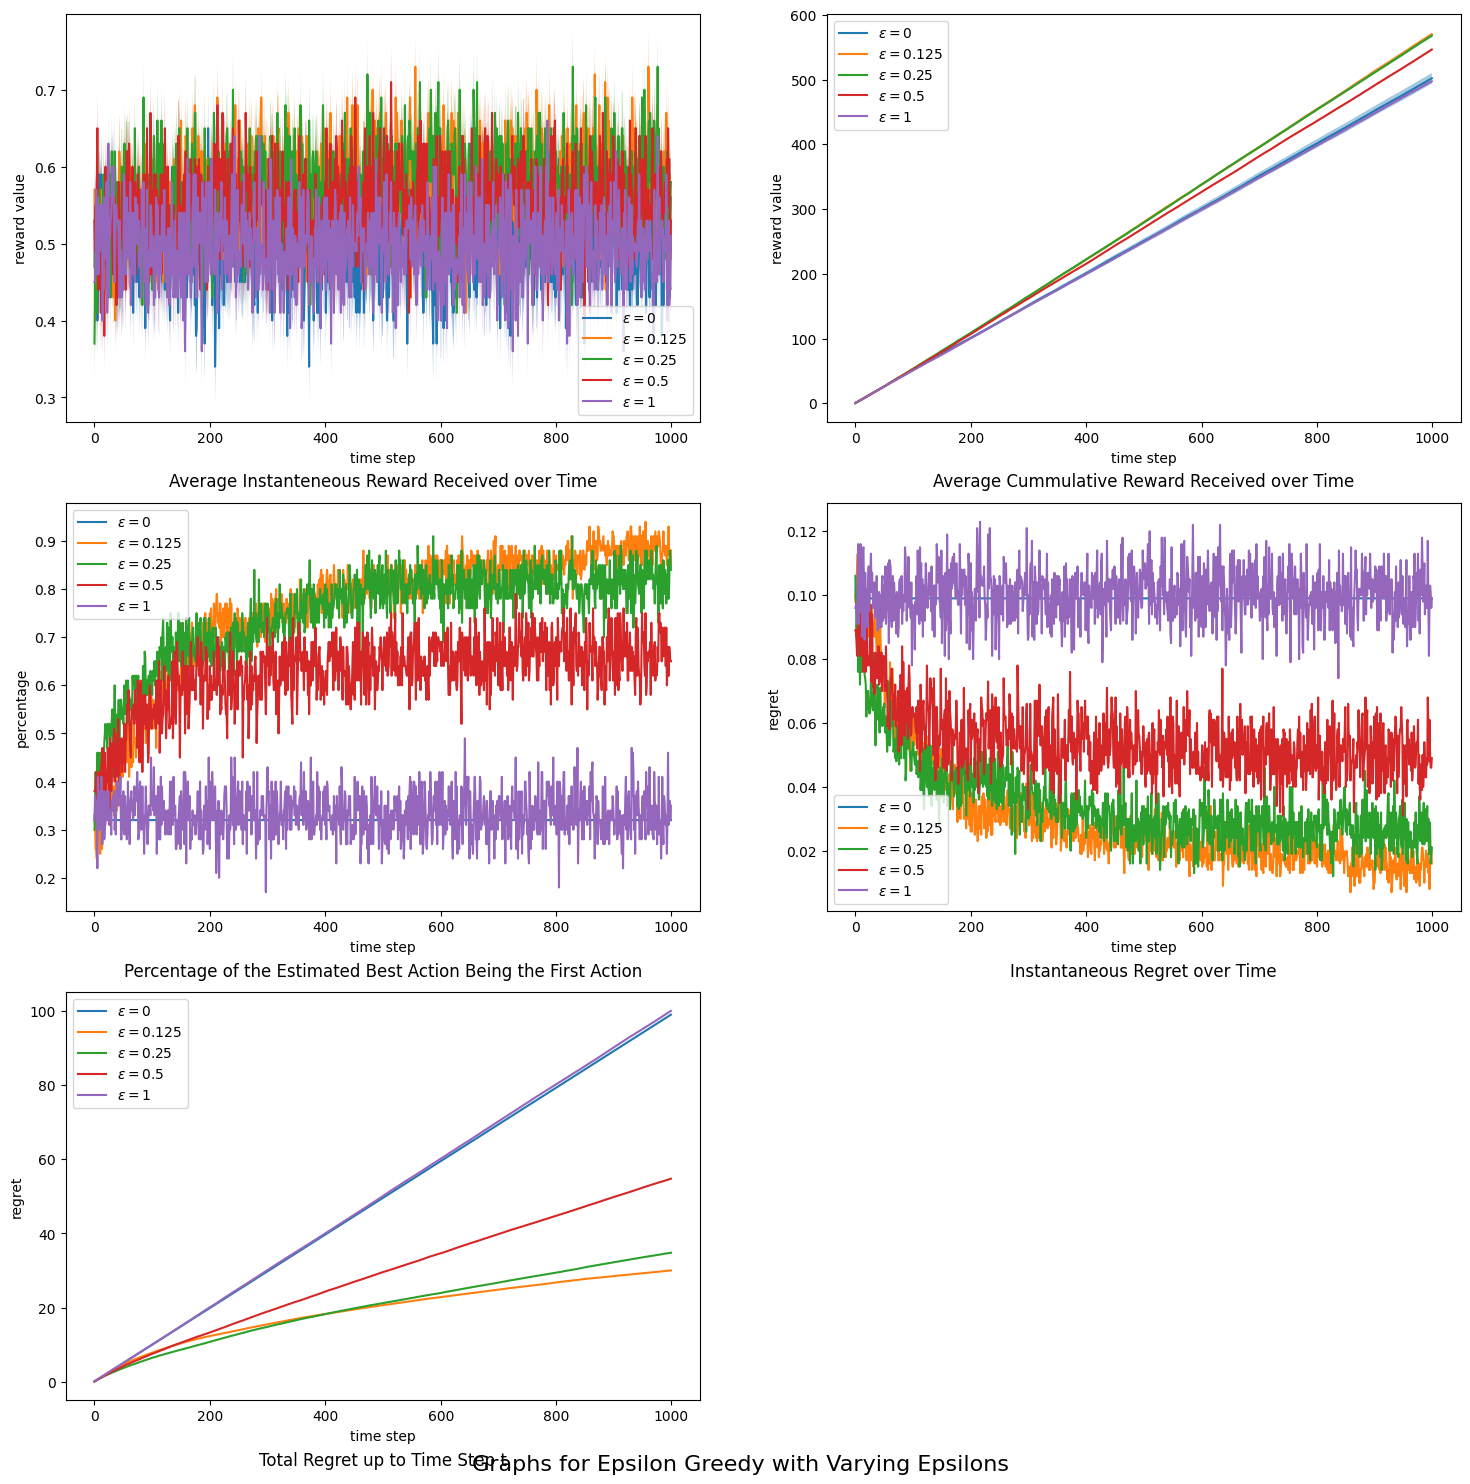

In [ ]:
epsilons =  [0, 1/8, 1/4, 1/2, 1]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
    # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

- **Average Instantaneous Reward Over Time**:
   - Lower ε values (ε=0.125, ε=0.25, ε=0.5) have higher average rewards, indicating they are more often exploiting the best-known action while also doing exploration.
   - As ε equals to 0 and 1, the average rewards decrease due to the lake of exploration and exploitation.

- **Average Cumulative Reward Over Time**:
   - The plot shows that cumulative reward increase most rapidly ε=0.125
   - ε=0.5 and ε=0.25 show slower accumulation
   - ε=1 and 0 cumulative reward grows the slowest

- **Percentage of the Estimated Best Action Being the First Action**:
   - With ε=0.125, the percentage rises quickly, showing the algorithm is consistently exploiting the first action, which is assumed to be the best.
   - ε=0.5 and ε=0.25 show more gradual increases in percentage.
   - ε=0 show constant percentage as it doesn't do exploration
   - ε=1 do not have increase in percentage, as it prevents the algorithm from selecting the best action.

- **Instantaneous Regret Over Time**:
   - ε=0.125 shows minimal regret.
   - ε=0.25 and 0.5, regret increases slightly due to more exploration but still remains relatively low.
   - ε=0 and ε=1 exhibit higher regret

- **Total Regret Up to Time Step t**:
   - ε=0.125 shows minimal total regret.
   - ε=0.5 and ε=0.25 accumulate regret more quickly.
   - ε=0 and especially ε=1 show a more steep increase in total regret over time due to the lake of exploration and exploitation.

From the plot above, it can be observed that when ϵ = 0.125, it best balances the algorithm's exploration and exploitation ratio. The performance at 0.25 and 0.5 is weaker than at 0.125, and the performance at 0 and 1 is the worst. Therefore, we should conduct multiple experiments with different ϵ hyperparameters to select the optimal one. We also know that ϵ is important to the algorithm since it directly influences how often the algorithm will explore new options versus exploiting known rewards.

##Q5 Hyperparameters for Epsilon-greedy

### Graphs

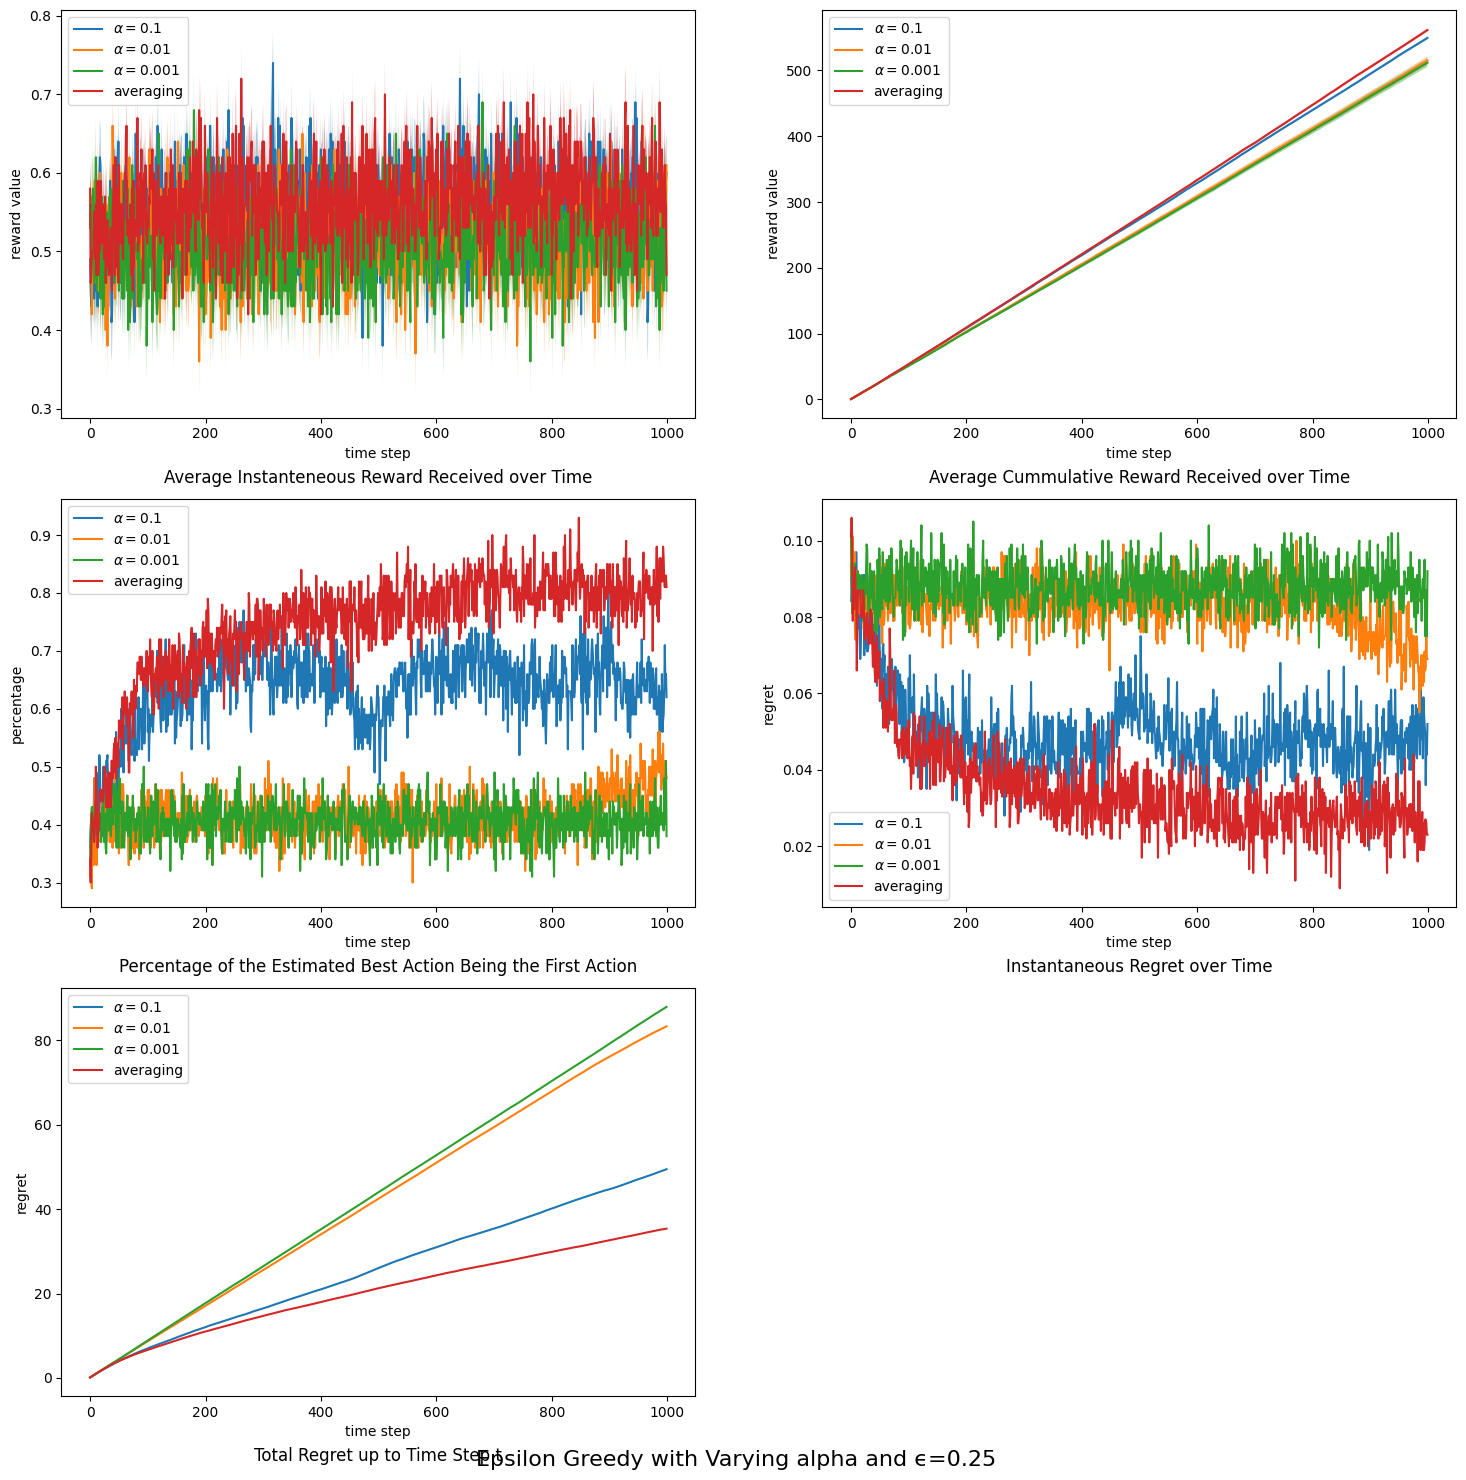

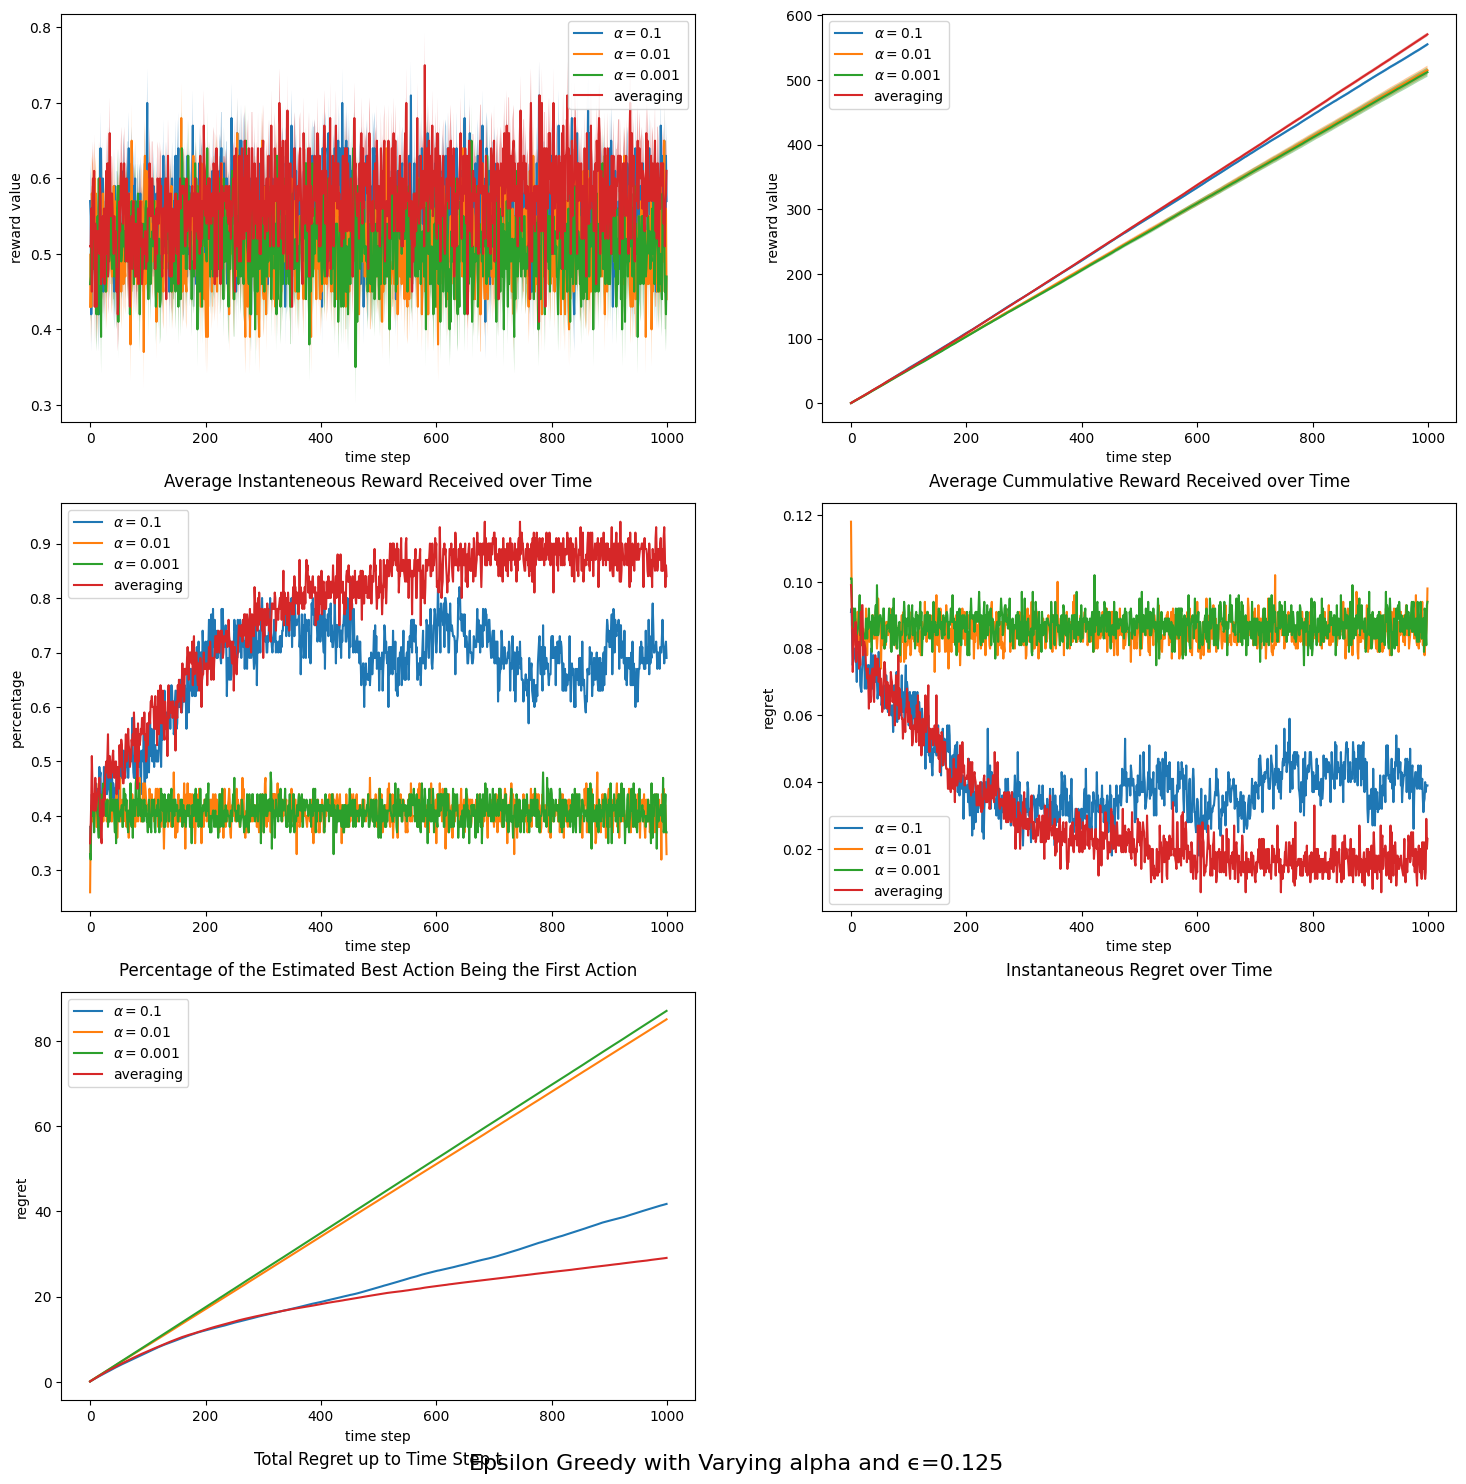

In [ ]:
epsilons = [1/4, 1/8]
alphas = [0.1, 0.01, 0.001, None]

for epsilon in epsilons:

  fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

  for alpha in alphas:

    # arrays of the data generated from 100 runs
    R_over_t_runs = []
    total_R_over_t_runs = []
    est_is_best_over_t_runs = []
    l_over_t_runs = []
    total_l_over_t_runs = []

    for run in range(100):
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon=epsilon, alpha=alpha)
      R_over_t_runs.append(R_over_t)
      total_R_over_t_runs.append(total_R_over_t)
      est_is_best_over_t_runs.append(est_is_best_over_t)
      l_over_t_runs.append(l_over_t)
      total_l_over_t_runs.append(total_l_over_t)

    R_over_t_runs = np.asarray(R_over_t_runs)
    total_R_over_t_runs = np.asarray(total_R_over_t_runs)
    est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
    l_over_t_runs = np.asarray(l_over_t_runs)
    total_l_over_t_runs = np.asarray(total_l_over_t_runs)

    # plot the mean reward over time

    mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
    std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

    if alpha != None:
      axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alpha)
    else:
      axs[0,0].plot(mean_R_over_t_runs, label = "averaging")

    R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
    R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
    axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
      # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

    axs[0,0].legend()
    axs[0,0].set_xlabel("time step")
    axs[0,0].set_ylabel("reward value")
    axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

    # plot the mean cummulative reward over time

    mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

    if alpha != None:
      axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alpha)
    else:
      axs[0,1].plot(mean_total_R_over_t_runs, label = "averaging")

    total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
    total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
    axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

    axs[0,1].legend()
    axs[0,1].set_xlabel("time step")
    axs[0,1].set_ylabel("reward value")
    axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

    #plot the mean percentage of the estimated best action being the first action

    est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)

    if alpha != None:
      plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
    else:
      plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = "averaging")

    axs[1,0].legend()
    axs[1,0].set_xlabel("time step")
    axs[1,0].set_ylabel("percentage")
    axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

    #plot the mean instantaneous regret over time

    l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)

    if alpha != None:
      axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
    else:
      axs[1,1].plot(l_over_t_runs_avgs, label = "averaging")

    axs[1,1].legend()
    axs[1,1].set_xlabel("time step")
    axs[1,1].set_ylabel("regret")
    axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

    #plot the total regret over time

    total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)

    if alpha != None:
      axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
    else:
      axs[2,0].plot(total_l_over_t_runs_avgs, label = "averaging")

    axs[2,0].legend()
    axs[2,0].set_xlabel("time step")
    axs[2,0].set_ylabel("regret")
    axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

  axs[-1, -1].axis('off')

  title = f"Epsilon Greedy with Varying alpha and ϵ={epsilon}"
  fig.suptitle(title, fontsize=16, y=0.08)

  plt.show()


### Answers

It can be observed that averaging increment have the best performance in the average reward and regret plots. Higher alpha values (higher learning rates) tend to have better performance in the average reward and regret plots than lower alpha value(lower learning rates), indicating more stable learning over time.

## Q6 UCB

In [ ]:
def UCB(bandit, c=2, alpha=None, num_time_steps=1000):
    """Upper confidence bound algorithm for bandit action selection

    Parameters
    ----------
    bandit : bandit class
        A bernoulli bandit attributes num_arms and probs_arr, and method sample
    c: int
        A parameter which determines the degree of exploration, the higher the c the higher the tendency for
        the algorithm to explore potentially suboptimal actionss
    alpha: (optional) float
        A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
        Default is none, corresponding to incremental averaging.

    Returns
    -------
    R_over_t
        a list of instantaneous return over the time steps
    total_R_over_t
        a list of cummulative reward over the time steps
    est_is_best_over_t
        a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
    l_over_t
        a list of instanteneous regret over the time steps
    total_l_over_t
        a list of cummulative regret over the time steps
    """
    num_arms = bandit.num_arms

    Q_arr = np.zeros(num_arms)  # array of estimated average reward for each action
    N_arr = np.zeros(num_arms)  # array of number of times picked for each action
    total_R = 0
    total_l = 0

    opt_value = max(bandit.probs_arr)  # highest expected reward among all actions
    best_action = bandit.probs_arr.index(opt_value)  # the index of the action with highest expected reward

    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    for time_step in range(num_time_steps):
        arm_index = 0
        max_ucb = float('-inf')
        for i in range(num_arms):
            if N_arr[i] == 0:
                ucb = float('inf')
            else:
                ucb = Q_arr[i] + c * math.sqrt(math.log(time_step + 1) / N_arr[i])
            if ucb > max_ucb:
                max_ucb = ucb
                arm_index = i

        curr_R = bandit.sample(arm_index)
        N_arr[arm_index] += 1

        if alpha is None:
            # incremental averaging
            Q_arr[arm_index] = Q_arr[arm_index] + (1 / N_arr[arm_index]) * (curr_R - Q_arr[arm_index])
        else:
            # using alpha
            Q_arr[arm_index] = Q_arr[arm_index] + alpha * (curr_R - Q_arr[arm_index])

        R_over_t.append(curr_R)

        total_R += curr_R
        total_R_over_t.append(total_R)

        est_is_best = 1 if arm_index == best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - bandit.probs_arr[arm_index]
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t


### Graphs

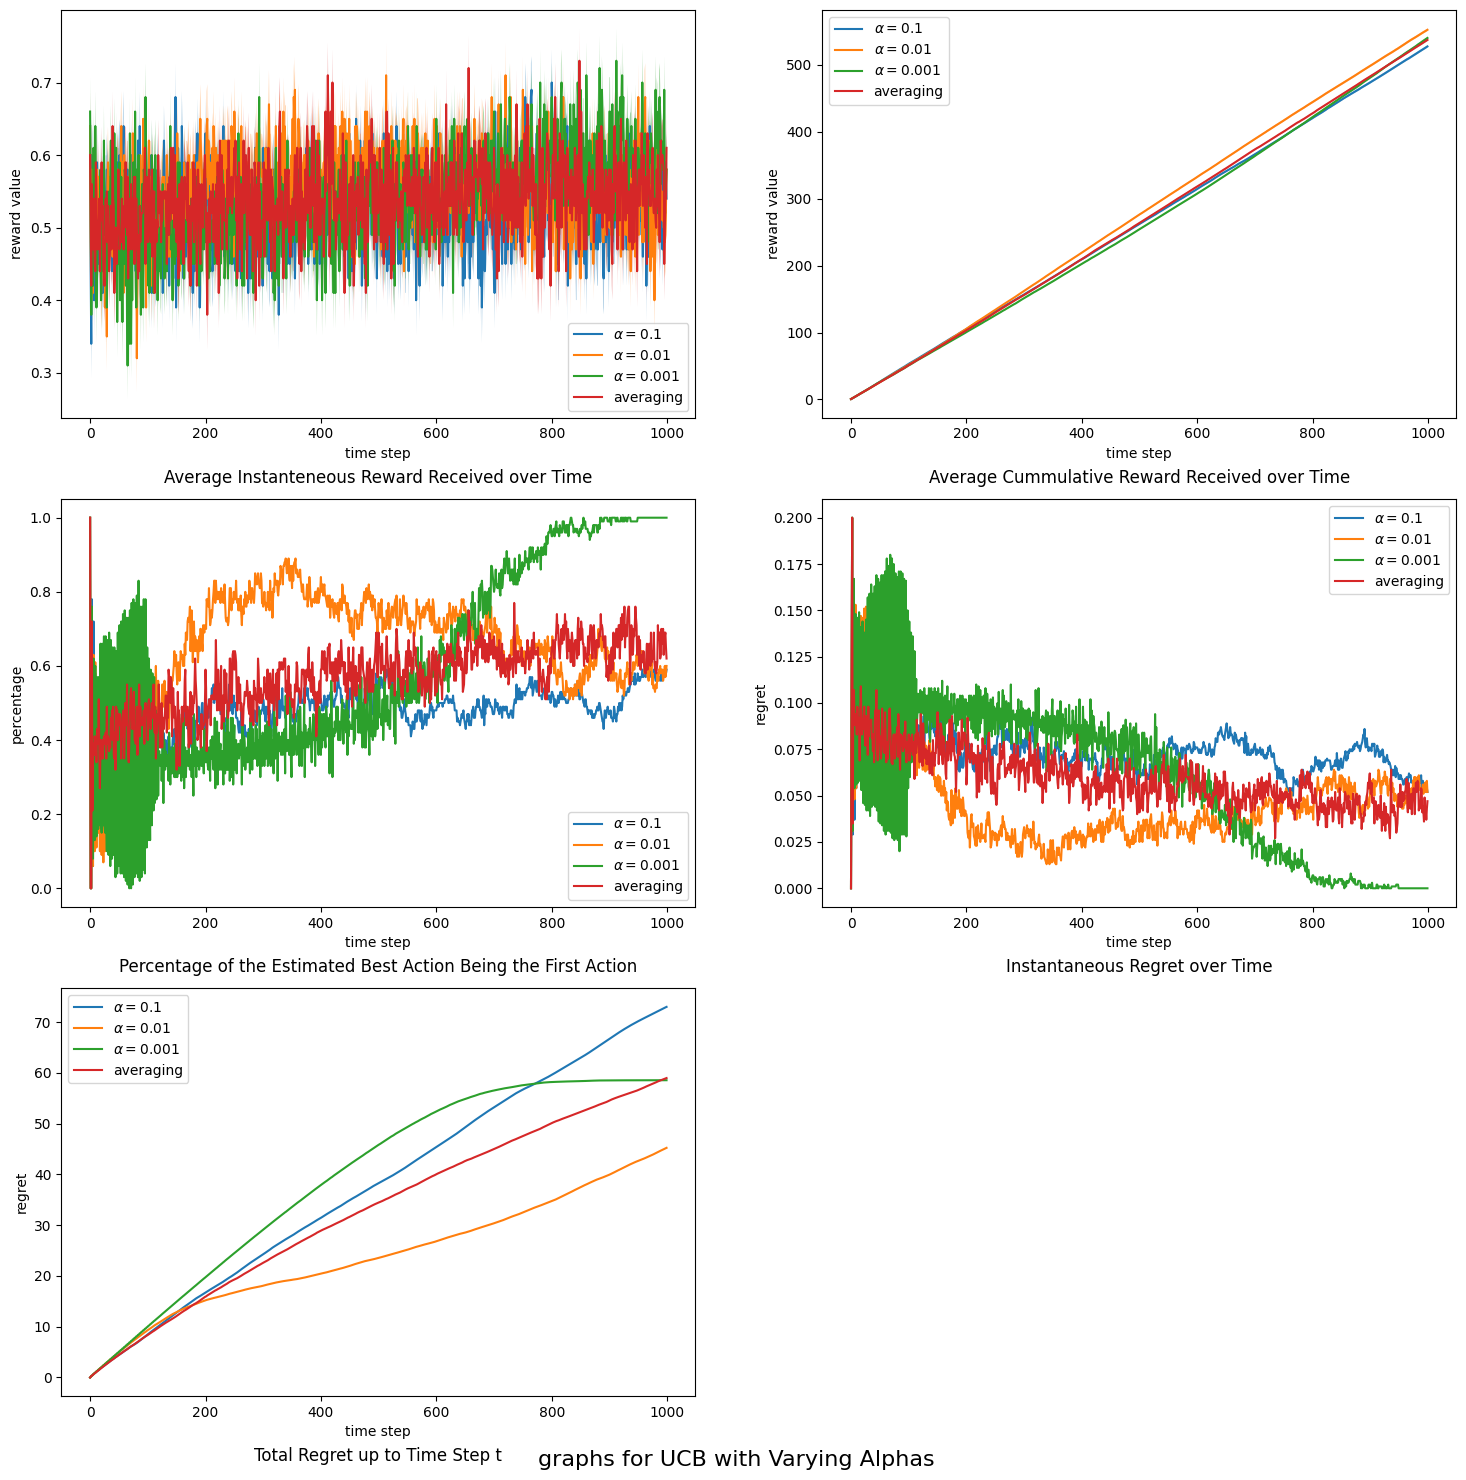

In [ ]:
alphas = [0.1, 0.01, 0.001, None]


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for alpha in alphas:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, alpha=alpha)
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  if alpha != None:
    axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alpha)
  else:
    axs[0,0].plot(mean_R_over_t_runs, label = "averaging")

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
    # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  if alpha != None:
    axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alpha)
  else:
    axs[0,1].plot(mean_total_R_over_t_runs, label = "averaging")

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)

  if alpha != None:
    plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
  else:
    plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = "averaging")

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)

  if alpha != None:
    axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
  else:
    axs[1,1].plot(l_over_t_runs_avgs, label = "averaging")

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)

  if alpha != None:
    axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
  else:
    axs[2,0].plot(total_l_over_t_runs_avgs, label = "averaging")

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = f"graphs for UCB with Varying Alphas"
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

- High α (0.1) adapts quickly with low initial volatility but leads to worse performance over time.

- Low α (0.001)shows high initial volatility and slower improvement, but leads to better performance over time.

- Averaging strikes a balance between adaptability and stability, showing moderate initial volatility and steady improvement, ultimately achieving a balance between performance and consistency over time.

## Q7 Thompson Sampling

In [ ]:
def Thompson_sampling(bandit, num_time_step=1000):
    """Thompson sampling algorithm for bandit action selection

    Parameters
    ----------
    bandit : bandit class
        A bernoulli bandit attributes num_arms and probs_arr, and method sample

    Returns
    -------
    R_over_t
        a list of instantaneous return over the time steps
    total_R_over_t
        a list of cummulative reward over the time steps
    est_is_best_over_t
        a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
    l_over_t
        a list of instanteneous regret over the time steps
    total_l_over_t
        a list of cummulative regret over the time steps
    """

    """ YOUR CODE GOES HERE """
    num_arms = bandit.num_arms
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = [], [], [], [], []
    total_R, total_l = 0, 0

    opt_value = max(bandit.probs_arr)
    best_action = [i for i, p in enumerate(bandit.probs_arr) if p == opt_value]

    for t in range(num_time_step):
        # Sample from Beta distribution for each arm
        sampled_probs = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(num_arms)]
        A = np.argmax(sampled_probs)

        # Observe the reward
        R = bandit.sample(A)

        # Update successes and failures
        if R == 1:
            successes[A] += 1
        else:
            failures[A] += 1

        # Record rewards and regrets
        R_over_t.append(R)
        total_R += R
        total_R_over_t.append(total_R)

        est_is_best = 1 if A in best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - bandit.probs_arr[A]
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t


### Graphs

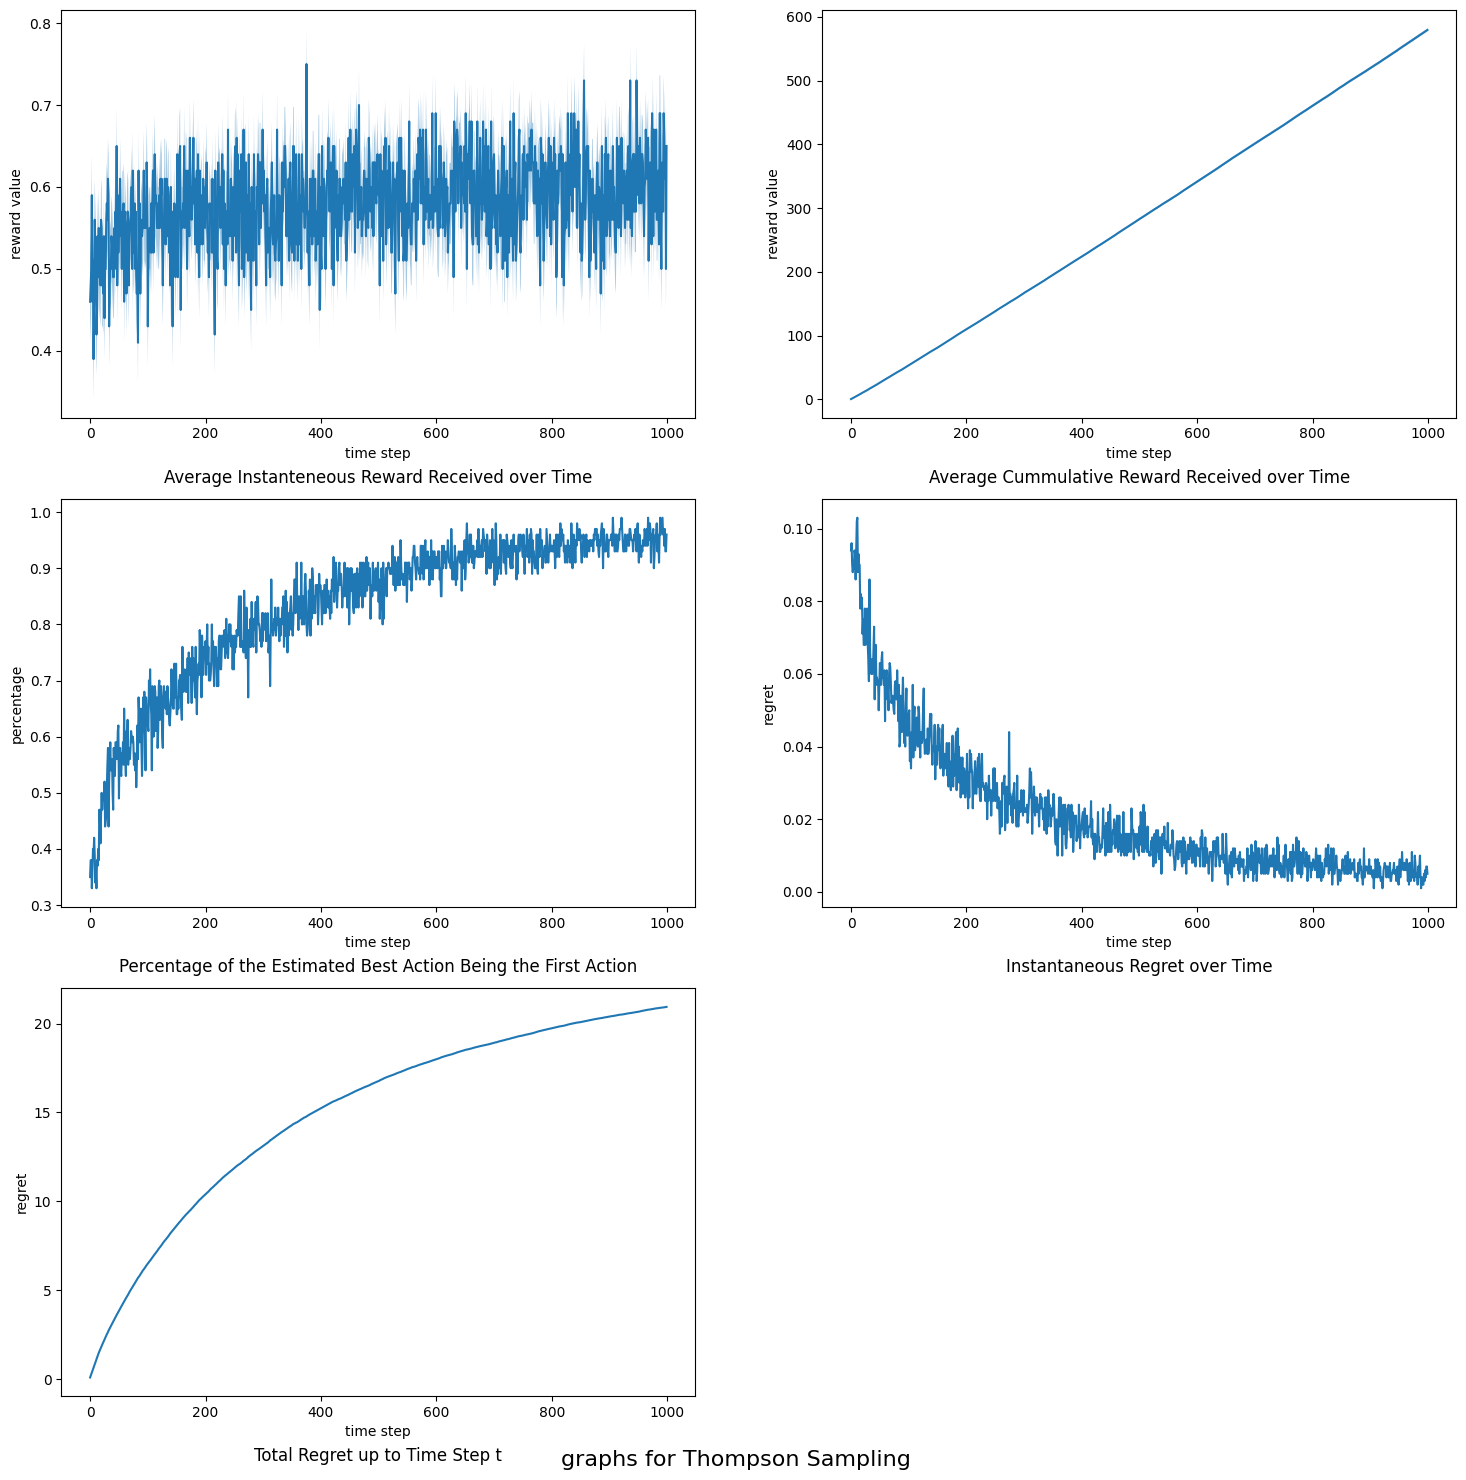

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))


# arrays of the data generated from 100 runs
R_over_t_runs = []
total_R_over_t_runs = []
est_is_best_over_t_runs = []
l_over_t_runs = []
total_l_over_t_runs = []

for run in range(100):
  R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_bernoulli_bandit)
  R_over_t_runs.append(R_over_t)
  total_R_over_t_runs.append(total_R_over_t)
  est_is_best_over_t_runs.append(est_is_best_over_t)
  l_over_t_runs.append(l_over_t)
  total_l_over_t_runs.append(total_l_over_t)

R_over_t_runs = np.asarray(R_over_t_runs)
total_R_over_t_runs = np.asarray(total_R_over_t_runs)
est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
l_over_t_runs = np.asarray(l_over_t_runs)
total_l_over_t_runs = np.asarray(total_l_over_t_runs)

# plot the mean reward over time

mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

if alpha != None:
  axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alpha)
else:
  axs[0,0].plot(mean_R_over_t_runs, label = "averaging")

R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

# axs[0,0].legend()
axs[0,0].set_xlabel("time step")
axs[0,0].set_ylabel("reward value")
axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

# plot the mean cummulative reward over time

mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

if alpha != None:
  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alpha)
else:
  axs[0,1].plot(mean_total_R_over_t_runs, label = "averaging")

total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

# axs[0,1].legend()
axs[0,1].set_xlabel("time step")
axs[0,1].set_ylabel("reward value")
axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

#plot the mean percentage of the estimated best action being the first action

est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)

if alpha != None:
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
else:
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = "averaging")

# axs[1,0].legend()
axs[1,0].set_xlabel("time step")
axs[1,0].set_ylabel("percentage")
axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

#plot the mean instantaneous regret over time

l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)

if alpha != None:
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
else:
  axs[1,1].plot(l_over_t_runs_avgs, label = "averaging")

# axs[1,1].legend()
axs[1,1].set_xlabel("time step")
axs[1,1].set_ylabel("regret")
axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

#plot the total regret over time

total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)

if alpha != None:
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alpha)
else:
  axs[2,0].plot(total_l_over_t_runs_avgs, label = "averaging")

# axs[2,0].legend()
axs[2,0].set_xlabel("time step")
axs[2,0].set_ylabel("regret")
axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = f"graphs for Thompson Sampling"
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers


- Linear growth in cumulative rewards, showing consistent performance.
- Increasing selection of the best action, as seen by the growing percentage of best actions chosen first.
- Diminishing regret, indicating improving action choices as time progresses.

the algorithm efficiently progresses from exploration to exploitation, optimizing decisions effectively over time.

## Q8 Comparison of Algorithms

### Graphs

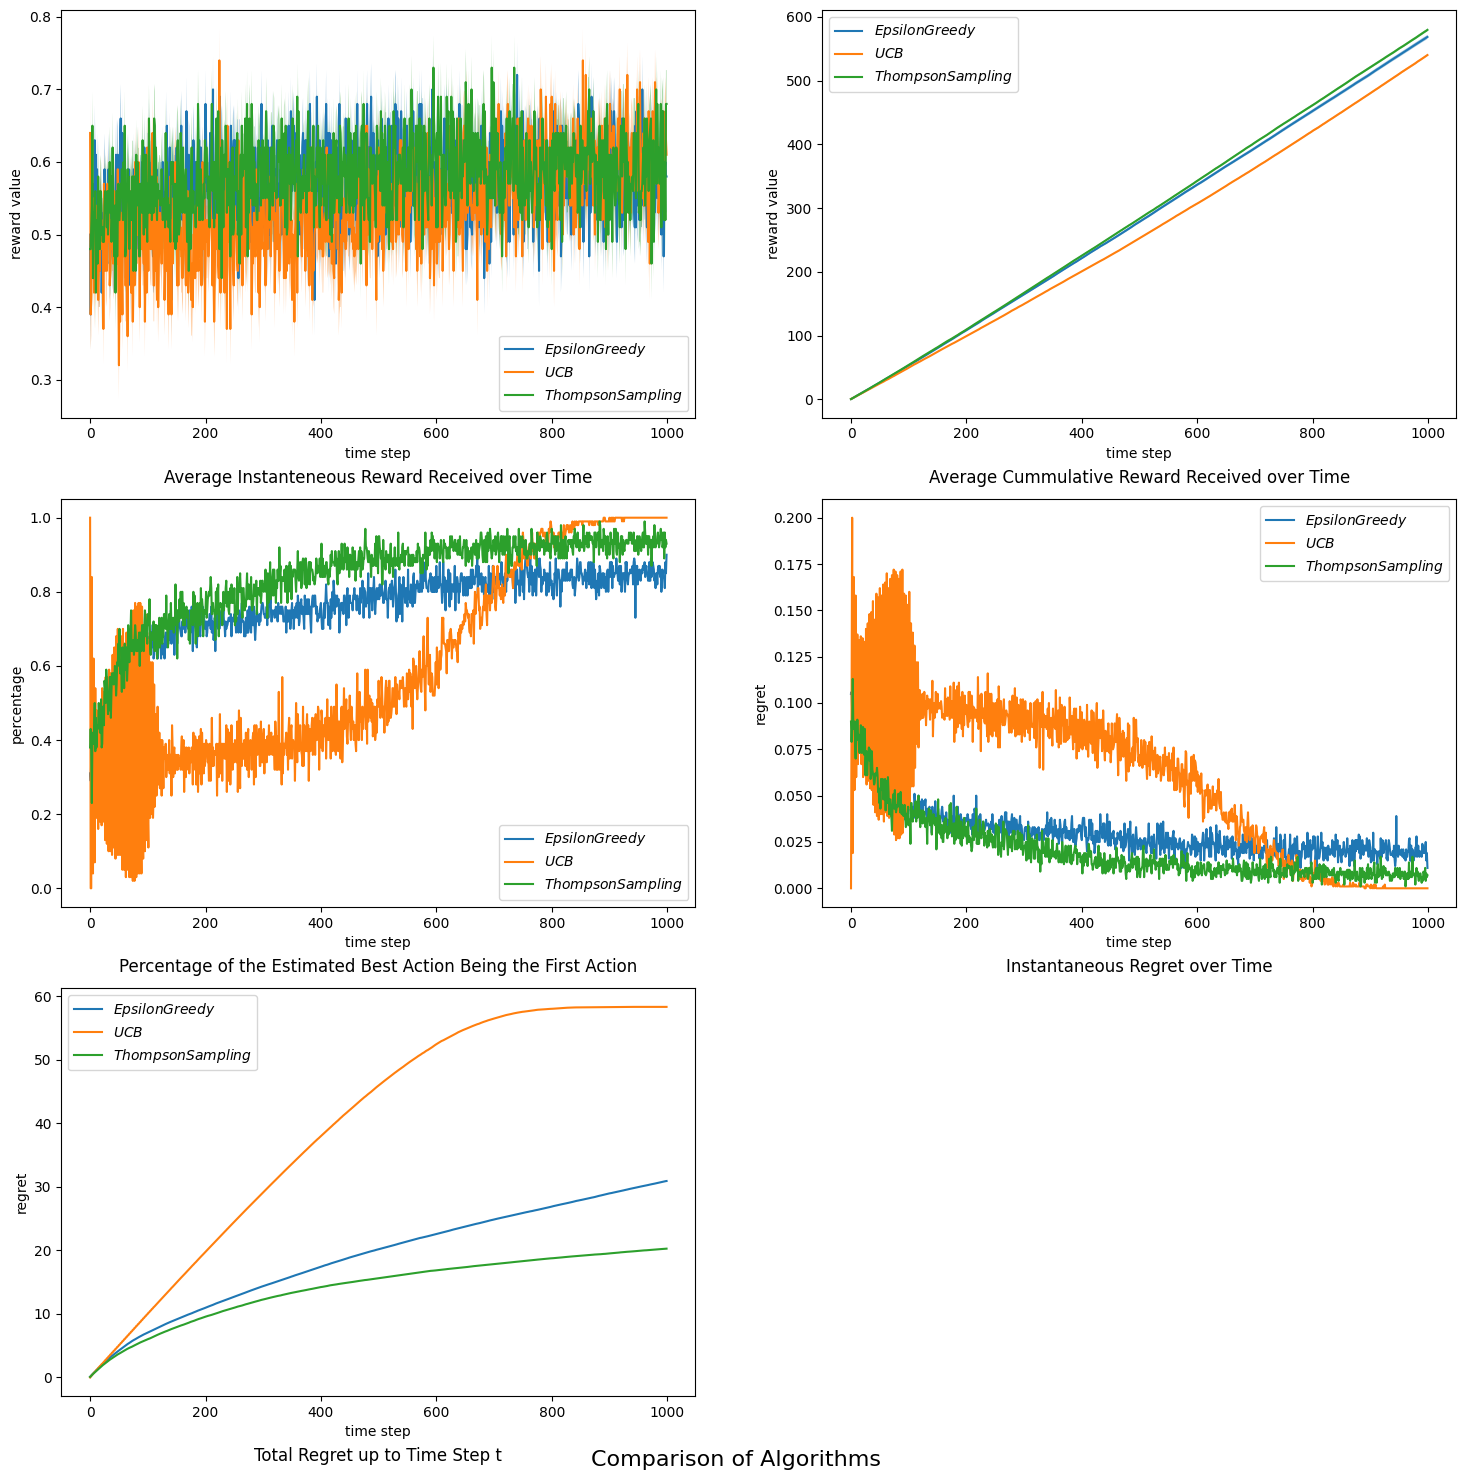

In [ ]:
algorithms = ["Epsilon Greedy", "UCB", "Thompson Sampling"]


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for algorithm in algorithms:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):

    if algorithm == "Epsilon Greedy":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon=0.125, alpha=None)
    elif algorithm == "UCB":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, alpha=0.001)
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_bernoulli_bandit)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))


  axs[0,0].plot(mean_R_over_t_runs, label = r"$%s$" %algorithm)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
    # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$%s$" %algorithm)


  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)

  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$%s$" %algorithm)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)

  axs[1,1].plot(l_over_t_runs_avgs, label = r"$%s$" %algorithm)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)

  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$%s$" %algorithm)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = f"Comparison of Algorithms"
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

The optimal parameter selection for my three algorithms is based on an analysis of five performance indicators across multiple parameter sets for each algorithm. The optimal parameters are determined by calculating the proportion of times each parameter set yields the best performance across these five indicators.

**Reward:**
- **Epsilon-Greedy:** Inconsistent rewards due to exploration-exploitation trade-off.
- **UCB:** Variability in rewards, but with a trend towards improvement.
- **Thompson Sampling:** High and more stable rewards.

**Regret:**
- **Epsilon-Greedy:** Higher regret due to exploration.
- **UCB:** Decreasing regret, indicating learning and improvement. But also have high initial volatility.
- **Thompson Sampling:** Quickest reduction in regret, showing efficient learning.

**Best Action Selection:**
- **Epsilon-Greedy:** Slower in consistently selecting the best action.
- **UCB:** Gradual improvement in selecting the best action. Also have high initial volatility.
- **Thompson Sampling:** Most consistent and quickest in selecting the best action.

Considering the balance between reward stability, regret minimization, and accurate selection of the best action, Thompson Sampling emerges as the optimal algorithm in this scenario.

## Q9 Non-stationary Environment

In [ ]:
def epsilon_greedy_un(bandit_1, bandit_2, epsilon, alpha=None, num_time_step=1000):
    num_arms = bandit_1.num_arms  # Assuming both bandits have the same number of arms

    Q_arr = np.zeros(num_arms)  # array of estimated average reward for each action
    N_arr = np.zeros(num_arms)  # array of number of times each action was picked
    total_R = 0
    total_l = 0
    actions = range(num_arms)

    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    for time_step in range(num_time_step):
        # Choose the bandit based on the time step
        current_bandit = bandit_1 if time_step <= 500 else bandit_2

        # Finding the optimal value and the best action for the current bandit
        opt_value = max(current_bandit.probs_arr)  # highest expected reward among all actions
        best_action = [i for i, p in enumerate(current_bandit.probs_arr) if p == opt_value]

        # Select the action with the highest estimated reward; randomly break ties
        A_star = np.random.choice([i for i, q in enumerate(Q_arr) if q == max(Q_arr)])
        A_random = np.random.choice(actions)
        A = A_random if random.random() < epsilon else A_star

        # Get reward for chosen action
        curr_R = current_bandit.sample(A)
        N_arr[A] += 1

        # Update Q values
        if alpha is None:
            # Incremental averaging
            Q_arr[A] += (curr_R - Q_arr[A]) / N_arr[A]
        else:
            # Update with fixed learning rate alpha
            Q_arr[A] += alpha * (curr_R - Q_arr[A])

        # Record rewards and estimates
        R_over_t.append(curr_R)
        total_R += curr_R
        total_R_over_t.append(total_R)

        est_is_best = 1 if A in best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - current_bandit.probs_arr[A]  # instantaneous regret
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

In [ ]:
def UCB_un(bandit_1, bandit_2, c=2, alpha=None, num_time_steps=1000):
    num_arms = bandit_1.num_arms  # Assuming both bandits have the same number of arms

    Q_arr = np.zeros(num_arms)  # Array of estimated average reward for each action
    N_arr = np.zeros(num_arms)  # Array of number of times picked for each action
    total_R = 0
    total_l = 0

    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []

    for time_step in range(num_time_steps):
        # Choose the bandit based on the time step
        current_bandit = bandit_1 if time_step <= 500 else bandit_2

        # Update optimal value and best action for the current bandit
        opt_value = max(current_bandit.probs_arr)  # Highest expected reward among all actions
        best_action = current_bandit.probs_arr.index(opt_value)  # Index of the action with highest expected reward

        arm_index = 0
        max_ucb = float('-inf')
        for i in range(num_arms):
            if N_arr[i] == 0:
                ucb = float('inf')
            else:
                ucb = Q_arr[i] + c * math.sqrt(math.log(time_step + 1) / N_arr[i])
            if ucb > max_ucb:
                max_ucb = ucb
                arm_index = i

        curr_R = current_bandit.sample(arm_index)
        N_arr[arm_index] += 1

        # Update Q values
        if alpha is None:
            # Incremental averaging
            Q_arr[arm_index] = Q_arr[arm_index] + (1 / N_arr[arm_index]) * (curr_R - Q_arr[arm_index])
        else:
            # Using fixed learning rate alpha
            Q_arr[arm_index] = Q_arr[arm_index] + alpha * (curr_R - Q_arr[arm_index])

        # Record rewards and estimates
        R_over_t.append(curr_R)
        total_R += curr_R
        total_R_over_t.append(total_R)

        est_is_best = 1 if arm_index == best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - current_bandit.probs_arr[arm_index]  # Instantaneous regret
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

In [ ]:
def Thompson_sampling_un(bandit_1, bandit_2, num_time_step=1000):
    num_arms = bandit_1.num_arms  # Assuming both bandits have the same number of arms
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = [], [], [], [], []
    total_R, total_l = 0, 0

    for t in range(num_time_step):
        # Choose the bandit based on the time step
        current_bandit = bandit_1 if t <= 500 else bandit_2

        # Update optimal value and best action for the current bandit
        opt_value = max(current_bandit.probs_arr)
        best_action = [i for i, p in enumerate(current_bandit.probs_arr) if p == opt_value]

        # Sample from Beta distribution for each arm
        sampled_probs = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(num_arms)]
        A = np.argmax(sampled_probs)

        # Observe the reward
        R = current_bandit.sample(A)

        # Update successes and failures
        if R == 1:
            successes[A] += 1
        else:
            failures[A] += 1

        # Record rewards and regrets
        R_over_t.append(R)
        total_R += R
        total_R_over_t.append(total_R)

        est_is_best = 1 if A in best_action else 0
        est_is_best_over_t.append(est_is_best)

        l_t = opt_value - current_bandit.probs_arr[A]
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)

    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t


### Graphs

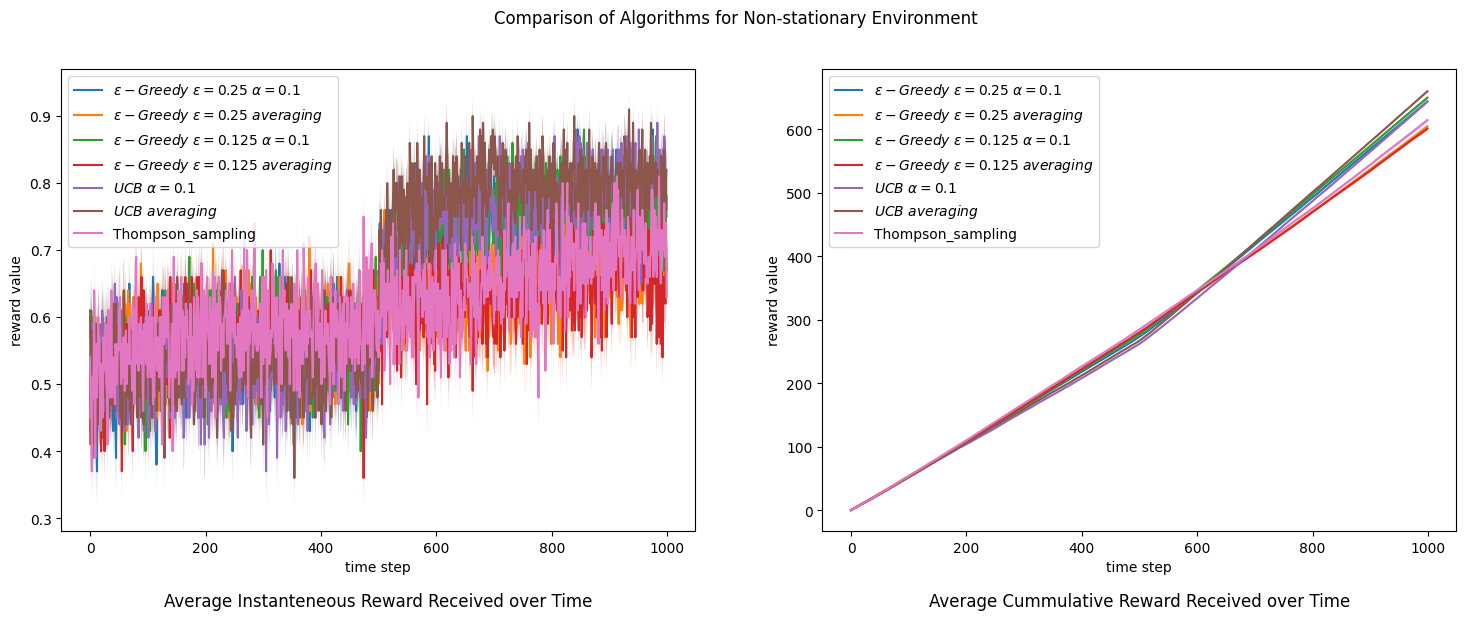

In [ ]:
algorithms = ["Epsilon Greedy", "UCB", "Thompson Sampling"]
epsilons = [1/4, 1/8]
alphas = [0.1, None]

delta = 0.1
num_arms_500 = 3
probs_arr_500 = [0.5 + delta, 0.5 + 2*delta, 0.5 + 3*delta]
three_arm_bernoulli_bandit_500 = BernoulliBandit(num_arms_500, probs_arr_500)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for algorithm in algorithms:

    # Epsilon Greedy
    if algorithm == "Epsilon Greedy":
        for epsilon in epsilons:
            for alpha in alphas:

                # arrays of the data generated from 100 runs
                R_over_t_runs = []
                total_R_over_t_runs = []
                est_is_best_over_t_runs = []
                l_over_t_runs = []
                total_l_over_t_runs = []

                for run in range(100):
                    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy_un(bandit_1=three_arm_bernoulli_bandit, bandit_2=three_arm_bernoulli_bandit_500, epsilon=epsilon, alpha=alpha)

                    R_over_t_runs.append(R_over_t)
                    total_R_over_t_runs.append(total_R_over_t)
                    est_is_best_over_t_runs.append(est_is_best_over_t)
                    l_over_t_runs.append(l_over_t)
                    total_l_over_t_runs.append(total_l_over_t)

                R_over_t_runs = np.asarray(R_over_t_runs)
                total_R_over_t_runs = np.asarray(total_R_over_t_runs)
                est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
                l_over_t_runs = np.asarray(l_over_t_runs)
                total_l_over_t_runs = np.asarray(total_l_over_t_runs)

                # plot the mean reward over time

                mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
                std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

                if alpha != None:
                    axs[0].plot(mean_R_over_t_runs, label = r"$\epsilon-Greedy \  \epsilon = %s \  \alpha = %s$" %(epsilon,alpha))
                else:
                    axs[0].plot(mean_R_over_t_runs, label = r"$\epsilon-Greedy \  \epsilon = %s \  averaging$" %epsilon)

                R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
                R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
                axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
                    # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

                axs[0].legend()
                axs[0].set_xlabel("time step")
                axs[0].set_ylabel("reward value")
                axs[0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

                # plot the mean cummulative reward over time

                mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
                std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

                if alpha != None:
                    axs[1].plot(mean_total_R_over_t_runs, label = r"$\epsilon-Greedy \  \epsilon = %s \  \alpha = %s$" %(epsilon,alpha))
                else:
                    axs[1].plot(mean_total_R_over_t_runs, label = r"$\epsilon-Greedy \  \epsilon = %s \  averaging$" %epsilon)

                total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
                total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
                axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

                axs[1].legend()
                axs[1].set_xlabel("time step")
                axs[1].set_ylabel("reward value")
                axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)


    # UCB
    elif algorithm == "UCB":
        for alpha in alphas:

            # arrays of the data generated from 100 runs
            R_over_t_runs = []
            total_R_over_t_runs = []
            est_is_best_over_t_runs = []
            l_over_t_runs = []
            total_l_over_t_runs = []

            for run in range(100):
                R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB_un(bandit_1=three_arm_bernoulli_bandit, bandit_2=three_arm_bernoulli_bandit_500, alpha=alpha)

                R_over_t_runs.append(R_over_t)
                total_R_over_t_runs.append(total_R_over_t)
                est_is_best_over_t_runs.append(est_is_best_over_t)
                l_over_t_runs.append(l_over_t)
                total_l_over_t_runs.append(total_l_over_t)

            R_over_t_runs = np.asarray(R_over_t_runs)
            total_R_over_t_runs = np.asarray(total_R_over_t_runs)
            est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
            l_over_t_runs = np.asarray(l_over_t_runs)
            total_l_over_t_runs = np.asarray(total_l_over_t_runs)

            # plot the mean reward over time

            mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
            std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

            if alpha != None:
                axs[0].plot(mean_R_over_t_runs, label = r"$UCB \  \alpha = %s$" %alpha)
            else:
                axs[0].plot(mean_R_over_t_runs, label = r"$UCB \  averaging$")

            R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
            R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
            axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
                # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

            axs[0].legend()
            axs[0].set_xlabel("time step")
            axs[0].set_ylabel("reward value")
            axs[0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

            # plot the mean cummulative reward over time

            mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
            std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

            if alpha != None:
                axs[1].plot(mean_total_R_over_t_runs, label = r"$UCB \  \alpha = %s$" %alpha)
            else:
                axs[1].plot(mean_total_R_over_t_runs, label = r"$UCB \  averaging$")

            total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
            total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
            axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

            axs[1].legend()
            axs[1].set_xlabel("time step")
            axs[1].set_ylabel("reward value")
            axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)


    # Thompson Sampling
    else:
        # arrays of the data generated from 100 runs
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        for run in range(100):
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling_un(bandit_1=three_arm_bernoulli_bandit, bandit_2=three_arm_bernoulli_bandit_500)

            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)
            est_is_best_over_t_runs.append(est_is_best_over_t)
            l_over_t_runs.append(l_over_t)
            total_l_over_t_runs.append(total_l_over_t)

        R_over_t_runs = np.asarray(R_over_t_runs)
        total_R_over_t_runs = np.asarray(total_R_over_t_runs)
        est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
        l_over_t_runs = np.asarray(l_over_t_runs)
        total_l_over_t_runs = np.asarray(total_l_over_t_runs)

        # plot the mean reward over time

        mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
        std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

        axs[0].plot(mean_R_over_t_runs, label = "Thompson_sampling")

        R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
        R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
        axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
            # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

        axs[0].legend()
        axs[0].set_xlabel("time step")
        axs[0].set_ylabel("reward value")
        axs[0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

        # plot the mean cummulative reward over time

        mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
        std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

        axs[1].plot(mean_total_R_over_t_runs, label = "Thompson_sampling")

        total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
        total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
        axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

        axs[1].legend()
        axs[1].set_xlabel("time step")
        axs[1].set_ylabel("reward value")
        axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)


plt.suptitle("Comparison of Algorithms for Non-stationary Environment")

plt.show()

### Answers


- Thompson Sampling appears to underperform in this scenario, showing suboptimal results in both average instantaneous reward and average cumulative reward.

- The final performance of UCB and Epsilon-Greedy algorithms appears similar, with both achieving comparable cumulative rewards over time. However, UCB seems to have weaker early performance compared to Epsilon-Greedy.

- Overall, considering both early and final performance across the given metrics, Epsilon-Greedy with ε=0.125 and α=0.1 demonstrates the best comprehensive performance in this non-stationary environment.